# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [19]:
# Obtendo a média e a diferença através da multiplicação matricial

# Matriz de transformação

m = np.array([[.5, .5], # Multiplica P1 e P2 por meio
              [-1, 1]]) # Multiplica P1 por -1 e P2 por 1

# Transformação linear

df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

<Axes: xlabel='p1', ylabel='p2'>

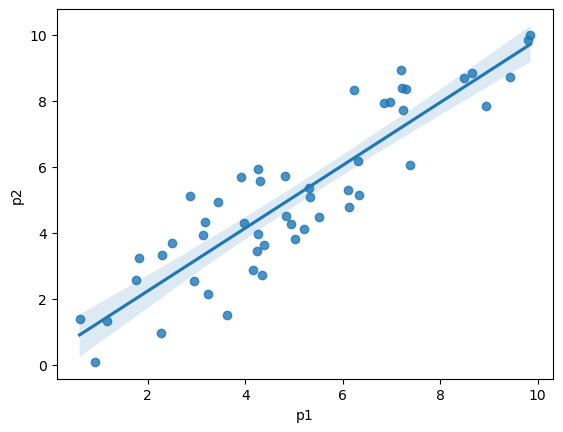

In [24]:
# Correlação entre a nota da P1 e a nota da P2

sns.regplot(y='p2', x='p1', data=df)

In [40]:
df.corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


<Axes: xlabel='diferenca', ylabel='media'>

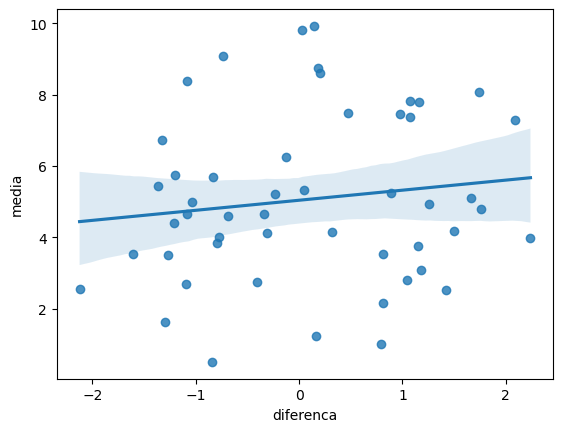

In [39]:
# Correlação entre a média e a diferença

df_rot = pd.DataFrame(df_rot).transpose()
df_rot.rename(columns={0: 'media', 1: 'diferenca'}, inplace=True)

sns.regplot(y='media', x='diferenca', data=df_rot)

In [41]:
df_rot.corr()

,media,diferenca
media,1.000000,0.133474
diferenca,0.133474,1.000000


## D

Analisando o gráfico obtido através da regressão linear das variáveis, p1 e p2, observa-se que as variáveis apresentam uma correlação positiva. Ao se obter uma boa nota na p1 espera-se que uma boa nota na p2.

Diferentemente do que é observado para as notas da p1 e p2, a media e a diferença não apresentam uma correlação evidente entre os dados.

Além do método gráfico, as correlações entre as variáveis pode ser observada através do método corr() do pandas, a partir dele chegamos a mesma resposta verificada pelos métodos gráficos, entretanto representado por um valor numérico.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

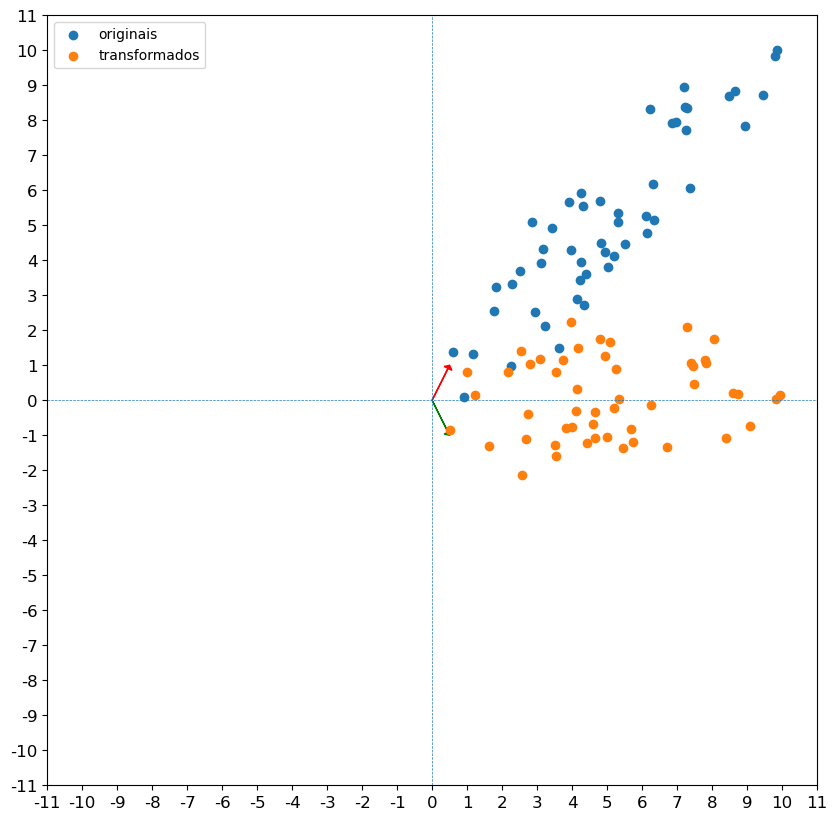

In [46]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -11
xmax = 11
ymin = -11
ymax = 11

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)

#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_rot['media'], df_rot['diferenca'], label='transformados')

#Legenda
plt.legend()

In [49]:
# Obtendo a média e a diferença através da multiplicação matricial

# Matriz de transformação

m = np.array([[1, 1], # Multiplica P1 e P2 por 1
              [-1, 1]]) # Multiplica P1 por -1 e P2 por 1

# Transformação linear

df_rot_1 = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

<Axes: xlabel='diferenca', ylabel='soma'>

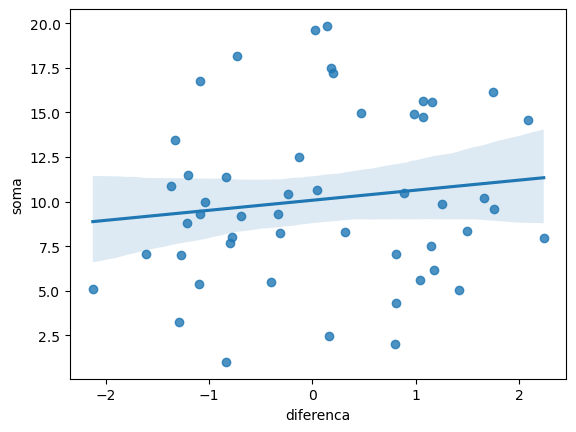

In [50]:
# Correlação entre a soma e a diferença

df_rot_1 = pd.DataFrame(df_rot_1).transpose()
df_rot_1.rename(columns={0: 'soma', 1: 'diferenca'}, inplace=True)

sns.regplot(y='soma', x='diferenca', data=df_rot_1)

<Axes: xlabel='diferenca', ylabel='media'>

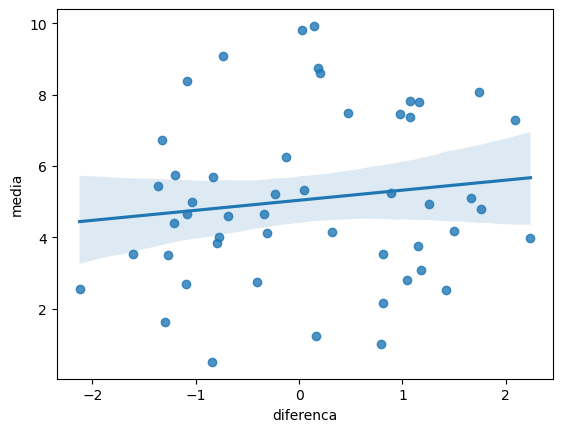

In [55]:
# Correlação entre a média e a diferença

df_rot = pd.DataFrame(df_rot).transpose()
df_rot.rename(columns={0: 'media', 1: 'diferenca'}, inplace=True)

sns.regplot(y='media', x='diferenca', data=df_rot)

Comparando o gráfico da média x diferença e soma x diferença observa-se uma diferença mínima, que decorre que o valor da média é metade do valor da soma, que faz todo sentido, pois com dois valores a média é obtida dividindo a soma por 2.

Em relação ao eixo x os valores estão na mesma posição cartesiana.